# Analysis 3
# Analysis on CO2 emissions

- Found the top CO2 emitting nations for 2013 and plotted them using matplotlib basemap & external library 'Cartopy'


In [2]:
# import pandas and read csv 
import pandas as pd
import numpy as np

worldBankData = pd.read_csv("/Users/vega/Downloads/WDI_csv/WDI_Data.csv")


In [3]:
#Create function to get the specific indicator names
def get_indicators():
	ind = worldBankData[['Indicator Name']]
	ind = ind.sort_values(by='Indicator Name')
	indicators = ind['Indicator Name'].tolist()
	return indicators
#Create function to get the CO2 emissions indicator names

def get_co2emissions_indicators():
	all_ind = get_indicators()
	co2emissions = []
	for ind in all_ind:
		if ('emissions' in ind.lower()):
			co2emissions.append(ind)
	return set(co2emissions)

#Get the indicators for  CO2 emissions from the data
#Print get_co2emissions_indicators()
#Based on the indicators available, we shall use 'CO2 emissions (metric tons per capita)'.

In [4]:
#Keep only data for countries which has value in atleast one year
yearColumns = [col for col in worldBankData.columns if col.isdigit()]
worldBankData = worldBankData.dropna(subset=[yearColumns], how='all')
worldBankData = worldBankData.drop('Unnamed: 61',1)


In [5]:
# Create the required dataframe for analysis
worldBankData_emissions = worldBankData.loc[worldBankData['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
worldBankData_emissions = worldBankData_emissions[['Country Name','Country Code','Indicator Name'] + list(worldBankData_emissions.columns[35:])]


In [22]:
#Countries with highest emission in 2013 in descending order
worldBankData_top10emissions = worldBankData_emissions.sort_values(by=['2013'], ascending=False)
countryList = worldBankData_top10emissions['Country Code'].tolist()

#Create list of groups
top50 = countryList[:50]
top100 = countryList[50:100]
top150= countryList[100:150]
top200 = countryList[150:200]

In [23]:
# import matplotlib and cartopy to plot our dataframe on a world map
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

plt.figure(figsize=(20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
#Assign different colors based on the category
for country in countries:
    if country.attributes['adm0_a3'] in top50:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('#8B0000'),
                          label=country.attributes['adm0_a3'])
    elif country.attributes['adm0_a3'] in top100:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('#DC143C'),
                          label=country.attributes['adm0_a3'])
    elif country.attributes['adm0_a3'] in top150:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('#CD5C5C'),
                          label=country.attributes['adm0_a3'])
    elif country.attributes['adm0_a3'] in top200:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('#F08080'),
                          label=country.attributes['adm0_a3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=('#c4e6ff'),
                          label=country.attributes['adm0_a3'])
plt.title("Analysis of CO2 emissions (metric tons per capita) in 2013",fontsize=25)

#Set legend names
top50 = mpatches.Patch(color='#8B0000', label='Top 50')
top100 = mpatches.Patch(color='#DC143C', label='Top 100')
top150 = mpatches.Patch(color='#CD5C5C', label='Top 150')
top200 = mpatches.Patch(color='#F08080', label='Top 200')
plt.legend(handles=[top50,top100,top150,top200],title='Top CO2 emmitting nations', loc=4)



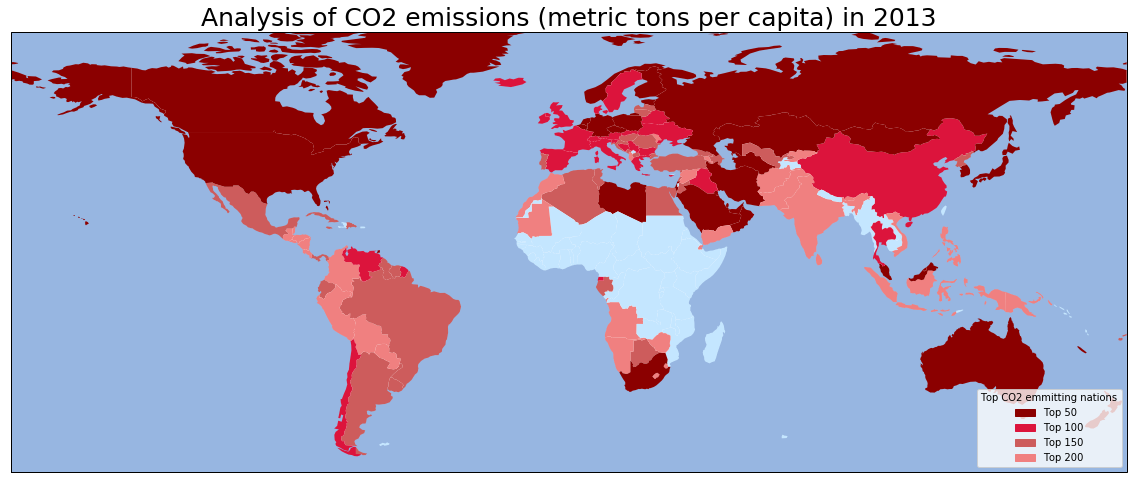

In [24]:
#Display the plot
plt.show()


# Conclusion
- Based on the analysis we find the top CO2 emitting nations for 2013 on plotted them on the world map using python library cartopy.